# Fluiddyn: open-source, open-science and Python for the fluid dynamics community

***See https://gfdyn.bitbucket.io for the slides***

**Ashwin Vishnu Mohanan**

Ph.D. student in Geophysical Fluid Dynamics

Linné FLOW Centre, KTH Mechanics

Supervisors: Erik Lindborg, Pierre Augier

<div align="middle">
<img src="./fig/logo_KTH.png"  style="width: 10%"> 
<img src="./fig/logo_FLOW.png"  style="width: 15%"> 
</div>


#### INTRODUCTION

## A possible scientific utopia

- Transparency in scientific methods and results

- Ease of reproducibility

- Openness to full scrutiny

- No more "reinventing the wheel" - particularly in code development


## How do we get there?

- Open science: Open-data, **Open-source**, Open-access, Open-courseware, Open-methodology, Open-peer-review ...

- Reusable code in sciences

- No "code decay": benefit from recent and future software and hardware developments



#### INTRODUCTION


## The rise of Scientific Python

- mature, efficient libraries with huge industry and community support

<div align="middle">
<img src="./fig/phd_python_ecosystem.png" width=50%>
</div>

- good coding practices, forges, documentation, unittests, continuous integration, benchmarking



#### INTRODUCTION


## The rise of Scientific Python

- specialized libraries by and for scientific communities (oriented towards subjects)

  * [astropy](http://www.astropy.org/) (astronomy)
  * [obspy](https://github.com/obspy/obspy/wiki) (seismology)
  * [biopython](https://github.com/biopython/biopython) (molecular biology)

**Only the very beginning of this trend in fluid mechanics!**

<div align="middle">
<img src="./fig/phd_astronomy.png" width=50%>
</div>

#### INTRODUCTION

## Why Python?


### Pros

- Versatile programming language with gentle learning curve

- Easy to migrate. Very similar to MATLAB/Octave syntax

- Interpreted, not compiled language

- Automatic documentation, testing, code-coverage analysis

### Cons

- Low performance compared to compiled languages C++, Fortran

Performance can be improved by offloading CPU intensive tasks to C++ or Fortran

#### INTRODUCTION

## Why Python?


*We should continue to move to higher levels of
abstraction, just like we've done before. We should trade application speed for
increased productivity, stability and maintainability. Programmer time is
almost always more expensive than CPU time. We aren't writing applications in
assembler anymore for the same reason we shouldn't be writing applications in C
anymore. - **From Haskell wiki***


### Example: Moving average filter algorithm - MATLAB vs Python 

Note: without using any one-line functions

#### INTRODUCTION

## Why Python?

### Moving average filter in MATLAB /  Octave

In [ ]:
 v = .01; f = 100; fs = 5000; t = 0:1/fs:.03
 x = sin(2 * pi * f * t);                             %original signal
 r = sqrt(v) * randn(1, length(t));                %noise
 Xw = x + r;                                      %signal plus noise (filter input)
 y = zeros(___,'like',x)
 for n = 3:length(Xw),
    y(n) = sum(Xw(n - 2:n)) / 3;       %y[n] is the filtered signal
 end 
 plot(y); hold; plot(x,'r');     %plot the original signal over filtered signal

#### INTRODUCTION

## Why Python?

### Moving average filter in Python

In [22]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('figure', figsize=(5,1), dpi=100)

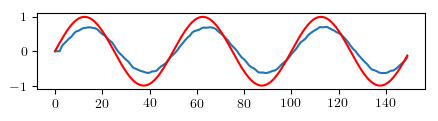

In [23]:
 from pylab import *

 v = .01; f = 100; fs = 5000; t = arange(0, .03, 1 /fs)
 x = sin(2 * pi * f * t)                             # original signal 
 r = sqrt(v) * random(len(t))                    # noise
 Xw = x + r                                      # signal plus noise (filter input)
 y = zeros_like(x)
 for n in range(3, len(Xw)):
    y[n] = sum(Xw[n - 2:n]) / 3       # y[n] is the filtered signal
 plot(y); plot(x,'r'); show()   # plot the original signal over filtered signal

## Fluid mechanics

Science of flows. 

### Methods

- Experiments
- Analytical computations
- Numerical simulations

  * Strong dominance of **Fortran** and **Matlab**
  * Close-source and old-school open-source software
  * Open-science and open-data still weak

## FluidDyn project: a suite of Python packages for fluid dynamics

Open-source, documented, tested, continuous integration

- [fluiddyn](https://bitbucket.org/fluiddyn/fluiddyn): base package containing utilities
- [fluidlab](https://bitbucket.org/fluiddyn/fluidlab): control of laboratory experiments
- [fluidimage](https://bitbucket.org/fluiddyn/fluidimage): scientific treatments of images (PIV)
- [fluidfft](https://bitbucket.org/fluiddyn/fluidfft): C++ / Python Fourier transform library (highly distributed, MPI, CPU/GPU, 2D and 3D)
- [fluidsim](https://bitbucket.org/fluiddyn/fluidsim): pseudo-spectral simulations in 2D and 3D
- [fluidfoam](https://bitbucket.org/fluiddyn/fluidfoam): Python utilities for openfoam

Main developers: Pierre Augier (LEGI), Cyrille Bonamy (LEGI), Antoine Campagne (LEGI), Ashwin Vishnu (KTH), Julien Salort (ENS Lyon).


# Numerical simulations

## [fluidsim](https://bitbucket.org/fluiddyn/fluidsim): pseudo-spectral simulations in 2D and 3D

- solves Burgers, Navier Stokes, Shallow water, Föppl-von Kármán equations using a shared code base
- highly modular (object oriented solvers)
- efficient (Cython, Pythran, mpi4py, h5py)
- on-the-fly data processing
- built-in specialized plotting functions


## [fluidfft](https://bitbucket.org/fluiddyn/fluidfft): unified API (C++ / Python) for FFT libraries (highly distributed, MPI, CPU and GPU, 2D and 3D)

In [1]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('figure', figsize=(5,5), dpi=100)

## [fluidsim](https://bitbucket.org/fluiddyn/fluidsim): Plotting preliminary results

- Statistics and useful data are computed and saved on-the-fly

#### Time averaged energy spectra

In [1]:
%%capture
import fluidsim as fls

sim = fls.load_state_phys_file('/scratch/avmo/13KTH/toy_model_potential/SW1Lexmod_noise_c=12_Bu=1.0_L=50.x50._1920x1920_2017-05-13_05-03-26/')

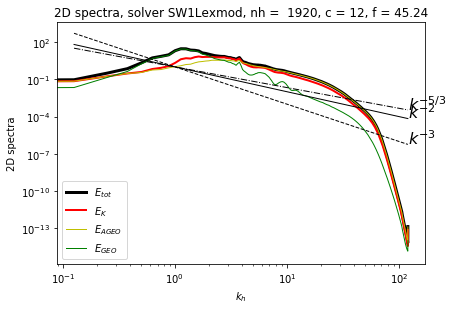

In [2]:
%%capture --no-display
sim.output.spectra.plot2d(tmin=100, delta_t=0, coef_compensate=0.)

## [fluidsim](https://bitbucket.org/fluiddyn/fluidsim): Plotting preliminary results

#### Pseudo-colour plot of potential vorticity 

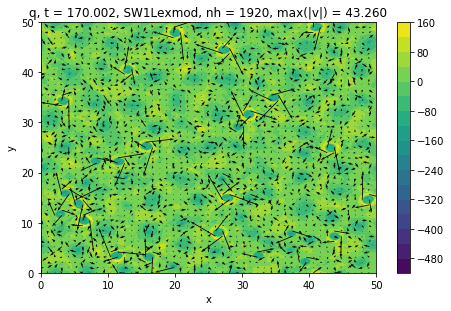

In [3]:
sim.output.phys_fields --no-display
sim.output.physkey_field=elds.plot(key_field='q')

## [fluidlab](https://bitbucket.org/fluiddyn/fluidlab): control of experiments in fluid mechanics

(Pierre Augier, LEGI & Julien Salors, ENS Lyon)

### Physical experiments can be seen as the interaction of autonomous physical objects

- Object-oriented programming
- Very easy to write instrument drivers
- Automatic documentation for the instrument drivers
- Simple servers with the Python package `rcpy`

#### Example for the carriage
- `motor.py`
- `position_sensor.py`
- `position_sensor_server.py`
- `position_sensor_client.py`
- `carriage.py`
- `carriage_server.py`
- `carriage_client.py`


## The MILESTONE experiment: stratified and rotating turbulence in the Coriolis platform

A collaboration between KTH, Stockholm, Sweden and LEGI, University of Grenoble, France

<img src="./fig/coriolis2.jpg"  style="width: 60%" align="middle">

<h4 align="center">The Coriolis platform (13 m diameter)</h4>

Used by international researchers through European projects (Euhit, Hydralab).

## [fluidlab](https://bitbucket.org/fluiddyn/fluidlab): control of experiments in fluid mechanics
A little bit of Graphical User Interface is easy, fun and useful. We use PyQt.

<img src="./fig/gui_carriage.jpg"  style="width: 75%" align="middle">

Remark: reusable code, here, random movement for another experiment.

## [fluidimage](https://bitbucket.org/fluiddyn/fluidimage): scientific treatments of images

(Pierre Augier, Cyrille Bonamy & Antoine Campagne, LEGI; and Ashwin Vishnu, KTH)

Software for images preprocessing and Particle Image Velocimetry (PIV) computation

Many images (~ 20 To of raw data): embarrassingly parallel problem

- Clusters and PC
- CPU/GPU
- **Asynchronous** computations (**topologies** of treatments, IO and CPU bounded parts are splitted, compatible with big data frameworks as Storm)
- Efficient algorythms and tools for fast computation with Python (Pythran, Theano, Pycuda, ...)

### 2D and scanning stereo PIV

### Utilities to display and analyze the PIV fields

- Plots of PIV fields (similar to PivMat, a Matlab library by F. Moisy) 
- Calcul of spectra, anisotropic structure functions, characteristic turbulent length scales

## [fluidimage](https://bitbucket.org/fluiddyn/fluidimage): PIV computation

Example of scripts to launch a PIV computation:

```python

from fluidimage.topologies.piv import TopologyPIV

params = TopologyPIV.create_default_params()

params.series.path = '../../image_samples/Karman/Images'
params.series.ind_start = 1
params.piv0.shape_crop_im0 = 32
params.multipass.number = 2
params.multipass.use_tps = True
params.saving.how = 'complete'
params.saving.postfix = 'piv_complete'

topology = TopologyPIV(params, logging_level='info')
topology.compute()
```

**Remark:** parameters in an instance of `fluiddyn.util.paramcontainer.ParamContainer`. Much better than in text files or free Python variables!

- avoid typing errors
- the user can easily look at the available parameters and their default value
- documentation for the parameters (for example for the [PIV topology](http://fluidimage.readthedocs.io/en/latest/generated/fluidimage.topologies.piv.html#module-fluidimage.topologies.piv))

## [fluidimage](https://bitbucket.org/fluiddyn/fluidimage): Launching PIV computation on cluster

Remark: launching computations on cluster is highly simplified by using fluiddyn:

```python
from fluiddyn.clusters.snic import Beskow

cluster = Beskow()

cluster.submit_script(
    'piv_complete.py', name_run='fluidimage',
    nb_nodes=1, nb_cores_per_node=8, email='johndoe@kth.se')
```


**Partial conclusion:** Open-data, data in auto-descriptive formats (hdf5, netcdf, ...) + code to use and understand the data.

## Conclusions

1. Science in fluid mechanics with open-source methods and Python

3. Development of *open-source*, *clean*, *reusable* codes (fluiddyn project)

**Issues** 

- Collaborative dynamics? Adoption by scientists? Developers?
- Level in Python and coding in the community ! => [Python training sessions in the lab and at university](https://python-uga.sciencesconf.org/)